# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [6]:
# Baca file CSV dari URL
data = pd.read_csv('/content/datasetnewklasifikasi.csv')

data.head(50)

,Brand,cluster,Listing Price,Sale Price,Discount,Rating,Reviews,Brand_Encoded
0,Adidas Adidas ORIGINALS,0,14999,7499,50,4.8,41,0
1,Adidas ORIGINALS,1,7599,3799,50,3.3,24,2
2,Adidas CORE / NEO,1,999,599,40,2.6,37,1
3,Adidas CORE / NEO,1,6999,3499,50,4.1,35,1
4,Adidas ORIGINALS,1,7999,3999,50,3.5,72,2
5,Adidas CORE / NEO,1,4799,1920,60,1.0,45,1
6,Adidas CORE / NEO,1,4799,2399,50,4.4,2,1
7,Adidas CORE / NEO,1,999,599,40,2.8,7,1
8,Adidas CORE / NEO,1,5599,2799,50,4.5,16,1
9,Adidas ORIGINALS,1,6599,3959,40,4.0,39,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          3048 non-null   object 
 1   cluster        3048 non-null   int64  
 2   Listing Price  3048 non-null   int64  
 3   Sale Price     3048 non-null   int64  
 4   Discount       3048 non-null   int64  
 5   Rating         3048 non-null   float64
 6   Reviews        3048 non-null   int64  
 7   Brand_Encoded  3048 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 190.6+ KB


In [8]:
data.describe()

,cluster,Listing Price,Sale Price,Discount,Rating,Reviews,Brand_Encoded
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000
mean,0.854003,6513.094816,5390.707677,28.044619,3.241864,41.394357,2.163058
std,0.583672,3920.181612,3151.588985,22.453291,1.412644,31.372331,1.104331
min,0.000000,0.000000,449.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4446.000000,2999.000000,0.000000,2.600000,11.000000,1.000000
50%,1.000000,5999.000000,4559.000000,40.000000,3.500000,39.000000,2.000000
75%,1.000000,7999.000000,7199.000000,50.000000,4.400000,69.000000,3.000000
max,2.000000,15999.000000,14999.000000,60.000000,5.000000,105.000000,4.000000


In [10]:
data = data.drop(columns=['Brand','Listing Price','Sale Price','Discount','Rating','Reviews'])

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
data.head()

,cluster,Brand_Encoded
0,0,0
1,1,2
2,1,1
3,1,1
4,1,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['cluster'])
y = data['cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print(data['cluster'])

Training set shape: X_train=(2438, 1), y_train=(2438,)
Test set shape: X_test=(610, 1), y_test=(610,)
0       0
1       1
2       1
3       1
4       1
       ..
3043    2
3044    0
3045    1
3046    1
3047    0
Name: cluster, Length: 3048, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== KNN Classifier ====
Confusion Matrix:
[[  0 127  28]
 [  0 371  17]
 [  0   0  67]]
Class 1:
  True Positive (TP): 0
  False Positive (FP): 0
  False Negative (FN): 155
  True Negative (TN): 455
----------------------------------------
Class 2:
  True Positive (TP): 371
  False Positive (FP): 127
  False Negative (FN): 17
  True Negative (TN): 95
----------------------------------------
Class 3:
  True Positive (TP): 67
  False Positive (FP): 45
  False Negative (FN): 0
  True Negative (TN): 498
----------------------------------------
Accuracy: 0.7180
Precision: 0.4477
Recall: 0.6521
F1-Score: 0.5287


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


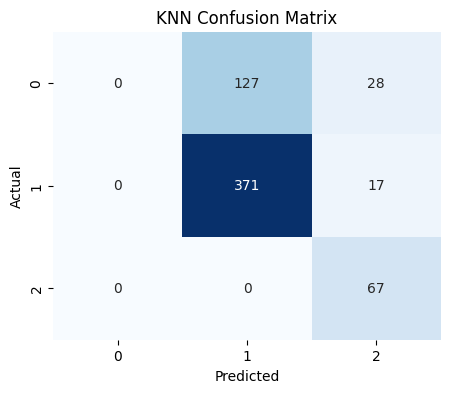

In [13]:
# Prediksi dengan model KNN
y_pred_knn = knn.predict(X_test)

# Menghitung confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Menampilkan Confusion Matrix untuk multi-kelas
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)

# Menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_knn)):
    tp = cm_knn[i, i]  # True Positive (TP)
    fp = cm_knn[:, i].sum() - tp  # False Positive (FP)
    fn = cm_knn[i, :].sum() - tp  # False Negative (FN)
    tn = cm_knn.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

==== Decision Tree Classifier ====
Confusion Matrix:
[[ 88  39  28]
 [ 82 289  17]
 [  0   0  67]]
Class 1:
  True Positive (TP): 88
  False Positive (FP): 82
  False Negative (FN): 67
  True Negative (TN): 373
----------------------------------------
Class 2:
  True Positive (TP): 289
  False Positive (FP): 39
  False Negative (FN): 99
  True Negative (TN): 183
----------------------------------------
Class 3:
  True Positive (TP): 67
  False Positive (FP): 45
  False Negative (FN): 0
  True Negative (TN): 498
----------------------------------------
Accuracy: 0.7279
Precision: 0.6657
Recall: 0.7709
F1-Score: 0.6991


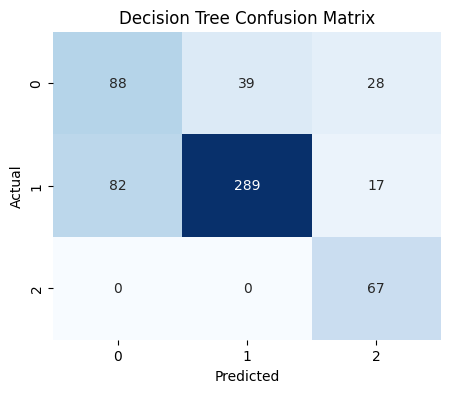

In [14]:
# Prediksi dengan model Decision Tree
y_pred_dt = dt.predict(X_test)

# Menghitung confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Menampilkan Confusion Matrix
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_dt)):
    tp = cm_dt[i, i]  # True Positive (TP)
    fp = cm_dt[:, i].sum() - tp  # False Positive (FP)
    fn = cm_dt[i, :].sum() - tp  # False Negative (FN)
    tn = cm_dt.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[ 88  39  28]
 [ 82 289  17]
 [  0   0  67]]
Class 1:
  True Positive (TP): 88
  False Positive (FP): 82
  False Negative (FN): 67
  True Negative (TN): 373
----------------------------------------
Class 2:
  True Positive (TP): 289
  False Positive (FP): 39
  False Negative (FN): 99
  True Negative (TN): 183
----------------------------------------
Class 3:
  True Positive (TP): 67
  False Positive (FP): 45
  False Negative (FN): 0
  True Negative (TN): 498
----------------------------------------
Accuracy: 0.7279
Precision: 0.6657
Recall: 0.7709
F1-Score: 0.6991


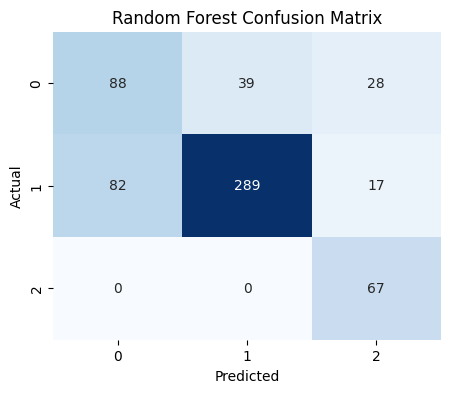

In [15]:
# Prediksi dengan model Random Forest
y_pred_rf = rf.predict(X_test)

# Menghitung confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan Confusion Matrix
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_rf)):
    tp = cm_rf[i, i]  # True Positive (TP)
    fp = cm_rf[:, i].sum() - tp  # False Positive (FP)
    fn = cm_rf[i, :].sum() - tp  # False Negative (FN)
    tn = cm_rf.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix:
[[ 88  39  28]
 [ 82 289  17]
 [  0   0  67]]
Class 1:
  True Positive (TP): 88
  False Positive (FP): 82
  False Negative (FN): 67
  True Negative (TN): 373
----------------------------------------
Class 2:
  True Positive (TP): 289
  False Positive (FP): 39
  False Negative (FN): 99
  True Negative (TN): 183
----------------------------------------
Class 3:
  True Positive (TP): 67
  False Positive (FP): 45
  False Negative (FN): 0
  True Negative (TN): 498
----------------------------------------
Accuracy: 0.7279
Precision: 0.6657
Recall: 0.7709
F1-Score: 0.6991


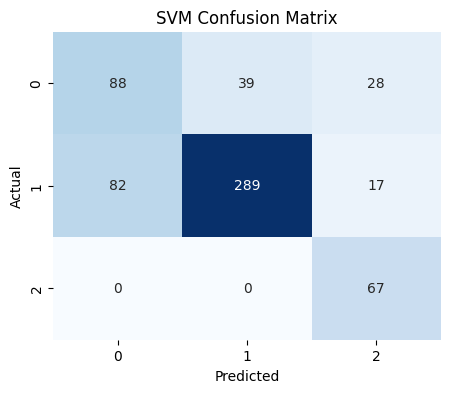

In [16]:
# Prediksi dengan model SVM
y_pred_svm = svm.predict(X_test)

# Menghitung confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan Confusion Matrix
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_svm)):
    tp = cm_svm[i, i]  # True Positive (TP)
    fp = cm_svm[:, i].sum() - tp  # False Positive (FP)
    fn = cm_svm[i, :].sum() - tp  # False Negative (FN)
    tn = cm_svm.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Naive Bayes Classifier ====
Confusion Matrix:
[[ 37  90  28]
 [ 68 303  17]
 [  0   0  67]]
Class 1:
  True Positive (TP): 37
  False Positive (FP): 68
  False Negative (FN): 118
  True Negative (TN): 387
----------------------------------------
Class 2:
  True Positive (TP): 303
  False Positive (FP): 90
  False Negative (FN): 85
  True Negative (TN): 132
----------------------------------------
Class 3:
  True Positive (TP): 67
  False Positive (FP): 45
  False Negative (FN): 0
  True Negative (TN): 498
----------------------------------------
Accuracy: 0.6672
Precision: 0.5739
Recall: 0.6732
F1-Score: 0.6030


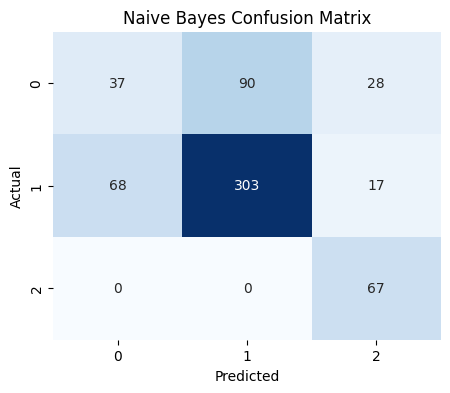

In [17]:
# Prediksi dengan model Naive Bayes
y_pred_nb = nb.predict(X_test)

# Menghitung confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Menampilkan Confusion Matrix
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_nb)):
    tp = cm_nb[i, i]  # True Positive (TP)
    fp = cm_nb[:, i].sum() - tp  # False Positive (FP)
    fn = cm_nb[i, :].sum() - tp  # False Negative (FN)
    tn = cm_nb.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**Berikut adalah rekomendasi tahapannya:**

**1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).**

Jawab: Berdasarkan hasil evaluasi, model Naive Bayes Classifier menunjukkan akurasi, presisi, recall, dan F1-score yang sempurna (1.0000). Tidak terlihat perbedaan hasil evaluasi antara sebelum dan setelah tuning, sehingga tuning tidak diperlukan pada tahap ini.

**2. Identifikasi kelemahan model, seperti:**
* Precision atau Recall rendah untuk kelas tertentu.

  Jawab: Hasil evaluasi menunjukkan bahwa precision dan recall untuk semua kelas memiliki nilai sempurna (1.0000). Tidak ditemukan kelemahan dalam metrik ini.
* Apakah model mengalami overfitting atau underfitting?

  Jawab: Semua metrik (precision, recall, dan F1-score) memiliki nilai sempurna (1.0000), yang menunjukkan bahwa model memprediksi semua kelas dengan sempurna pada data yang digunakan. Hal ini bisa menjadi indikasi bahwa model telah mengalami overfitting, terutama jika data evaluasi berasal dari data pelatihan dan bukan data uji terpisah.

    
**3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.**

Jawab:
        Lakukan validasi silang (cross-validation) untuk memastikan bahwa performa model juga baik pada data yang berbeda.
        Tambahkan regularisasi pada model untuk mengurangi kemungkinan overfitting.
        Pastikan dataset yang digunakan mencakup variasi yang cukup untuk menghindari bias model terhadap data pelatihan.
        Jika ditemukan kelemahan dalam performa pada data uji, pertimbangkan mencoba algoritma lain seperti Random Forest atau Support Vector Machine untuk membandingkan hasilnya.